# Context

In this notebook we will do some exploratory data analysis using bivariate and multivariate analysis

# Load packages

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Load data

using relative paths

In [47]:
filename = "bivariate_jhonattan.ipynb"  # Current file name
print(f"Current file name: {filename}\n")
print(f"Current absolute path: {os.getcwd()}\n")

# Specify the paths, relative to the current file
ACTUAL_DIR = os.path.dirname(os.path.abspath(filename))
BASE_DIR = os.path.dirname(ACTUAL_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f"BASE_DIR: {BASE_DIR}")
print(f"DATA_DIR: {DATA_DIR}")
print(f"OUTPUT_DIR: {OUTPUT_DIR}")

Current file name: bivariate_jhonattan.ipynb

Current absolute path: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\otros_archivos

BASE_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1
DATA_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data
OUTPUT_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data\output_data


In [48]:
df = pd.read_excel(os.path.join(OUTPUT_DIR, "hallazgos_clean.xlsx")).iloc[:, 1:]
df.head(5)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,distance_to_capital,is_rural,fecha_desembolso,visita_analista_credito,dia_semana_desembolso,dia_mes_desembolso,mes_desembolso,dias_desde_visita_a_desembolso,desembolso_fin_de_semana,desembolso_fin_de_mes,calificacion_cartera,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,12,4,10,0,2021-06-11,NaT,4.0,11.0,6.0,NaN,0,0,Si,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,1,1,5,0,2021-06-15,2021-06-08,1.0,15.0,6.0,7.0,0,0,No,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
2,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,dosquebradas,12,4,10,0,2022-05-03,NaT,1.0,3.0,5.0,NaN,0,0,Si,Si,modificado,2022,afecta estabilidad,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,1,1
3,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,oficios_tecnicos_y_manuales,1055378,205648,6,tulua,3,1,100,0,2022-03-11,2022-03-05,4.0,11.0,3.0,6.0,0,0,Si,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
4,Martha Cecilia Veru,AQT,Preferencial,venta_de_mercancia,comercio_y_ventas_general,2481136,170529,24,independencia,1,1,3,0,2022-07-23,2022-07-18,5.0,23.0,7.0,5.0,1,0,Si,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


# Info about the data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cliente                         2915 non-null   object        
 1   analista                        2916 non-null   object        
 2   tipo_credito                    2916 non-null   object        
 3   actividad                       2916 non-null   object        
 4   actividad_v2                    2916 non-null   object        
 5   monto                           2916 non-null   int64         
 6   cuota                           2916 non-null   int64         
 7   plazo                           2916 non-null   int64         
 8   oficina                         2916 non-null   object        
 9   zona                            2916 non-null   int64         
 10  regional                        2916 non-null   int64         
 11  dist

The data selected is....

lorep insum

# Bivariate analysis

## Justification of the variables selected below:

lorep insum

## monto v año

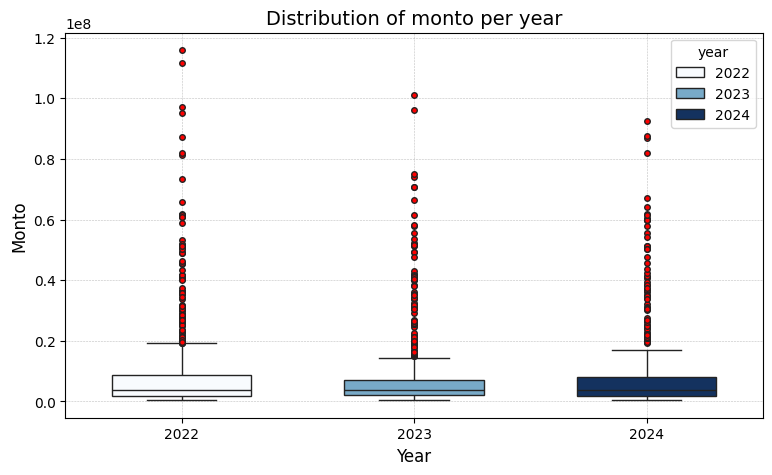

In [50]:
# Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(
    x=df["year"],
    y=df["monto"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=df["year"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)


plt.title("Distribution of monto per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monto", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.show()

In [51]:
# Lets check the amount per risk level

df.groupby(by="year").agg(
    {
        "monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

monto                                                        
         #     min       Q 10      Promedio        Q 90        max
year                                                              
2022  1285  400000  1011920.0  8.544114e+06  25685800.0  115832618
2023  1023  400000  1424283.4  7.108125e+06  13699954.0  100983196
2024   608  400000   600000.0  8.508897e+06  21094315.2   92506564

--> We can't notice a difference between the loan amounts over the years.

## monto v riesgo

In [52]:
# outliers monto

# Q1, Q3 & IQR
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

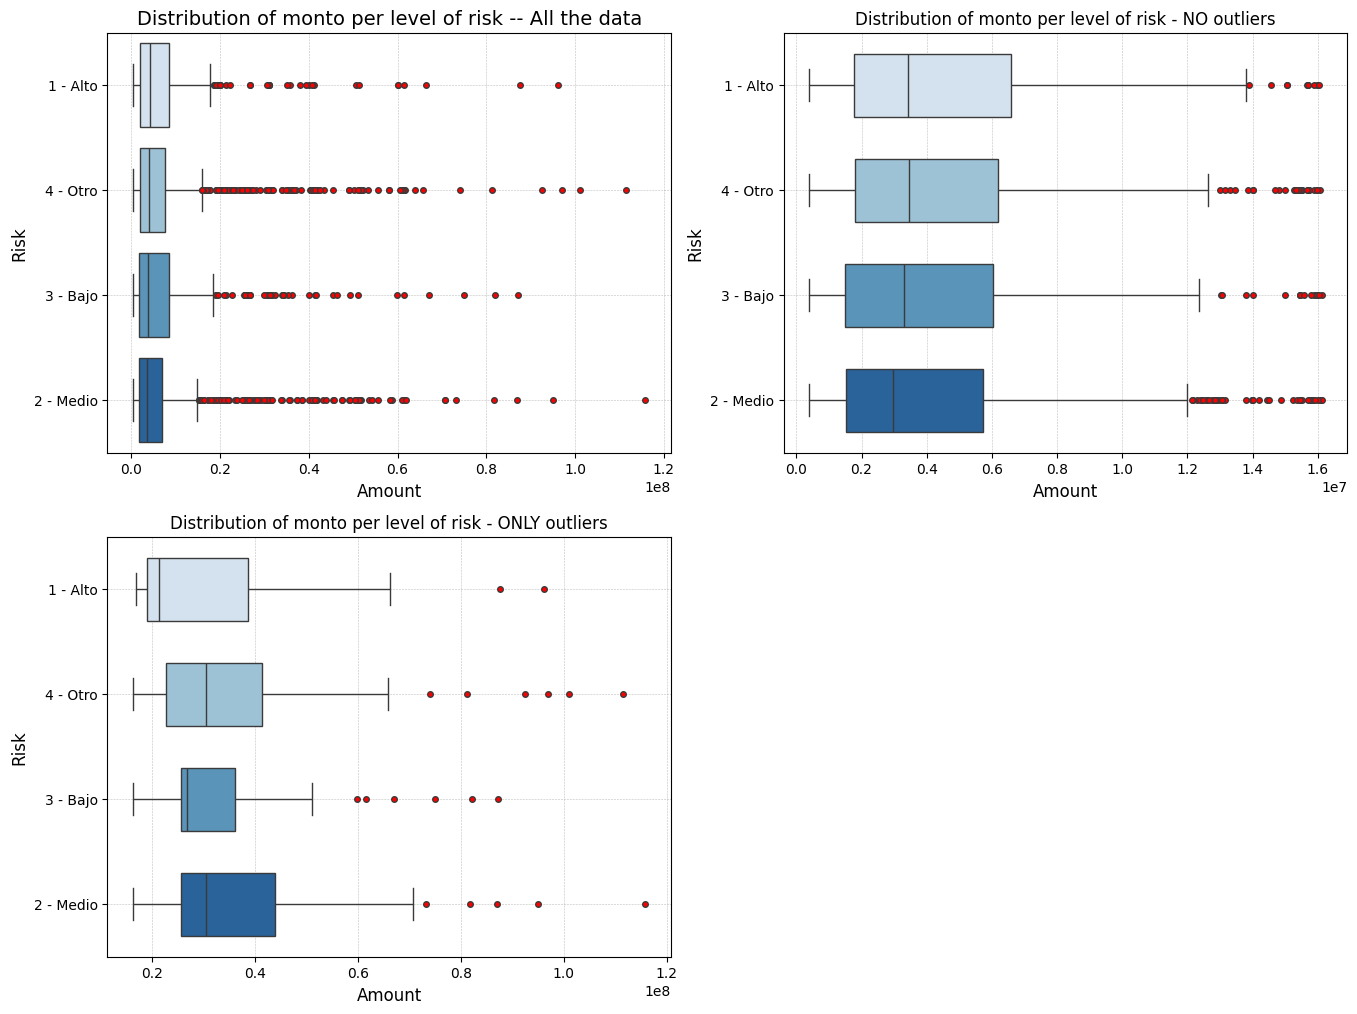

In [58]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
# Boxplot - monto per risk

sns.boxplot(
    y=df["riesgo"],
    x=df["monto"],
    palette="Blues",
    linewidth=1,
    width=0.8,
    hue=df["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)



plt.title("Distribution of monto per level of risk -- All the data", fontsize=14)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)



# plt.legend().remove()


plt.subplot(2, 2, 2)

# Boxplot - monto per risk WITHOUT OUTLIERS
temp = df[df["monto"] < upper_limit]

sns.boxplot(
    x=temp["monto"],
    y=temp["riesgo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per level of risk - NO outliers", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)



plt.subplot(2, 2, 3)

# Boxplot - monto per risk ONLY OUTLIERS
temp = df[df["monto"] > upper_limit]

sns.boxplot(
    x=temp["monto"],
    y=temp["riesgo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per level of risk - ONLY outliers", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.show()

### comments

--> We can notice some differences in the distribution of the microcredit amount by risk level when using only the data without outliers and when using the data with only outliers.  
This indicates that there is a possible difference in the relationship between the two variables in the two sets of observations.  
There is the possibility of creating different models according to the threshold amount to capture this pattern.

## monto v actividad

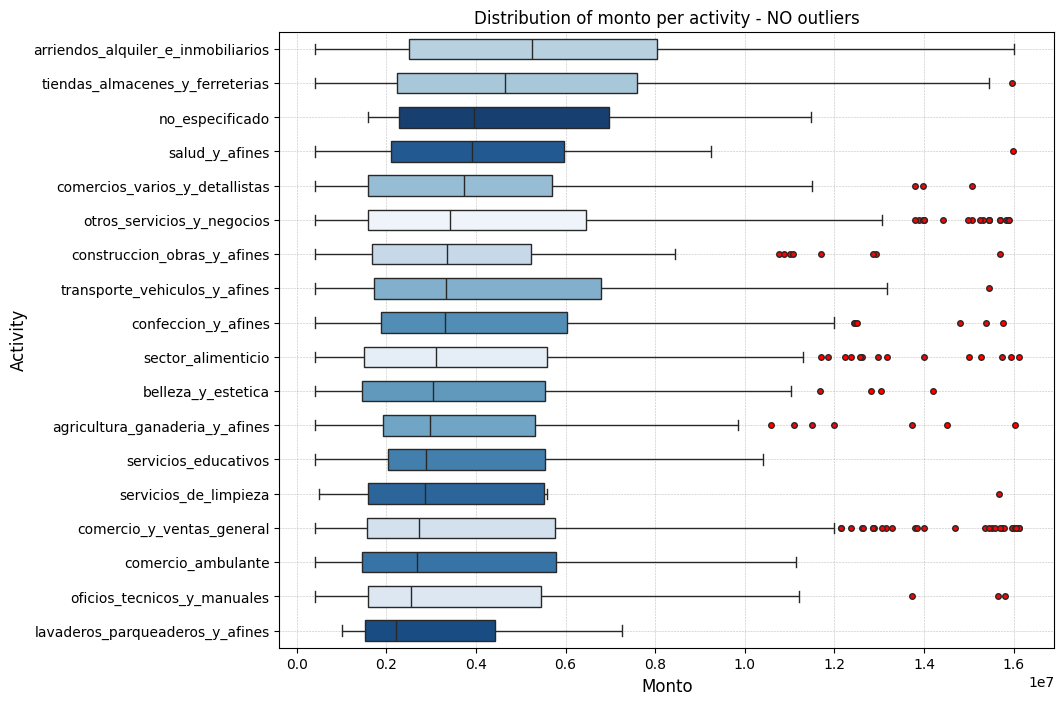

In [60]:
# Boxplot - monto per activity WITHOUT OUTLIERS

temp = df[df["monto"] < upper_limit]

order = (
    temp.groupby("actividad_v2")["monto"].median().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 8))
sns.boxplot(
    x=temp["monto"],
    y=temp["actividad_v2"],
    order=order,
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["actividad_v2"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per activity - NO outliers", fontsize=12)
plt.xlabel("Monto", fontsize=12)
plt.ylabel("Activity", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)

plt.show()

## oficina v riesgo

In [16]:
var1 = "oficina"
var2 = "riesgo"

print(df[[var1, var2]].dtypes)

cross_tab = (
    pd.crosstab(df[var1], df[var2], margins=True)
    .sort_values(by="All", ascending=False)
    .drop("All", axis=0)
)
print("\ncontingency_table:\n")
print(cross_tab.head(5))
print()
print(cross_tab.tail(5))

oficina    object
riesgo     object
dtype: object

contingency_table:

riesgo        1 - Alto  2 - Medio  3 - Bajo  4 - Otro  All
oficina                                                   
dosquebradas        41          2         0       134  177
ibague              28         16         3        80  127
fonsecca            20          5         0       100  125
tulua                9         32        28        22   91
santa rosa           0          8        22        47   77

riesgo        1 - Alto  2 - Medio  3 - Bajo  4 - Otro  All
oficina                                                   
buenaventura         2         17         0         6   25
patio bonito         1          9        15         0   25
pradera              0         23         0         1   24
soacha               3          6         5         8   22
apartado             2          6         0         6   14


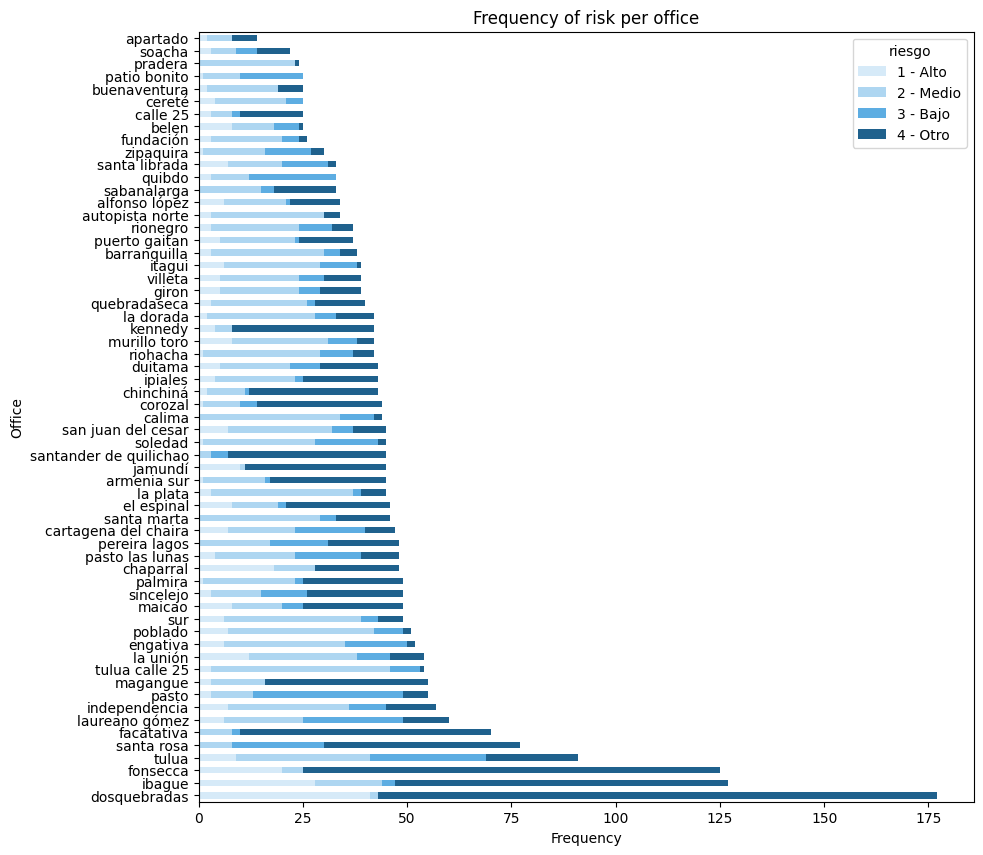

In [25]:
colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]

cross_tab.drop("All", axis=1).plot(
    kind="barh", stacked=True, figsize=(10, 10), color=colors
)
plt.title(f"Frequency of risk per office")
plt.ylabel("Office")
plt.xlabel("Frequency")

plt.show()

### Chi-square test

In [41]:
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-square: {chi2}, p-value: {p}')
if p < 0.05:
    print('There is a significant association between the office & the risk of the credit.')
else:
    print('No significant association was found between the office & the risk of the credit.')

Chi-square: 1680.2623061964741, p-value: 2.8379250877986126e-214
There is a significant association between the office & the risk of the credit.


## actividad v riesgo

In [ ]:
print("Frequency of audit´s risk per activity:\n")

cross_tab = pd.crosstab(df.actividad_v2, df.riesgo, margins=True).sort_values(
    by="All", ascending=False
)
cross_tab

Frequency of audit´s risk per activity:



riesgo,1 - Alto,2 - Medio,3 - Bajo,4 - Otro,All
actividad_v2,,,,,
All,325,1084,423,1084,2916
comercio_y_ventas_general,70,224,100,199,593
otros_servicios_y_negocios,59,198,70,162,489
sector_alimenticio,37,155,67,150,409
tiendas_almacenes_y_ferreterias,22,73,37,70,202
oficios_tecnicos_y_manuales,26,68,22,72,188
agricultura_ganaderia_y_afines,25,74,15,71,185
belleza_y_estetica,18,61,20,59,158
confeccion_y_afines,12,46,27,55,140


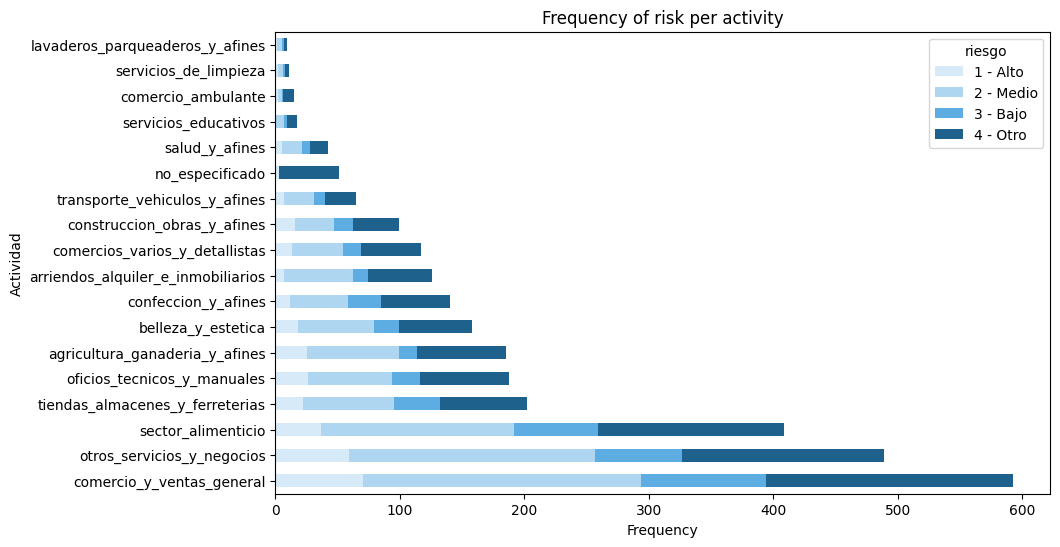

In [ ]:
colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_tab.drop("All", axis=0).drop("All", axis=1).plot(
    kind="barh", stacked=True, figsize=(10, 6), color=colors
)
plt.title(f"Frequency of risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Frequency")
plt.show()

Percentage of audit´s risk per activity:



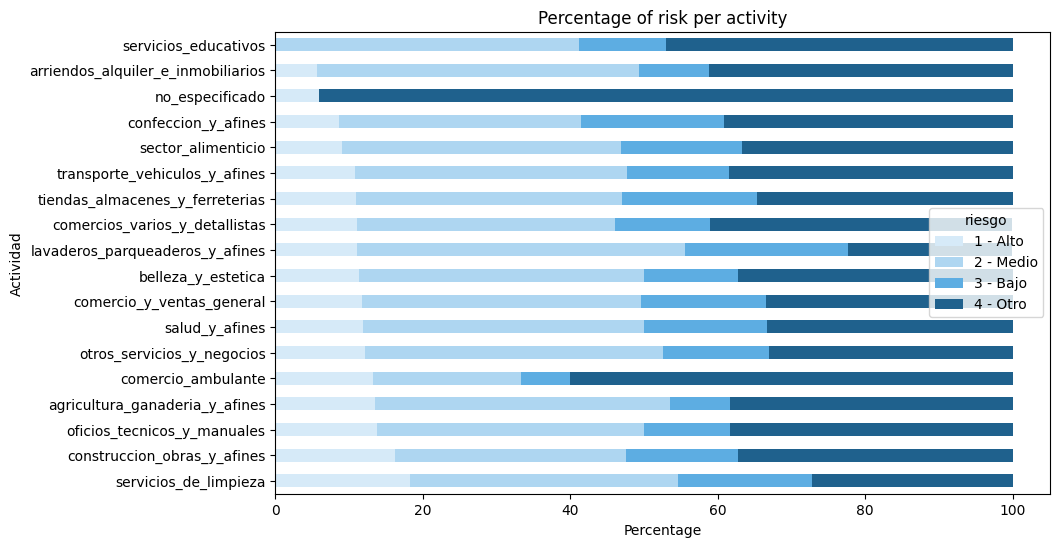

In [ ]:
print("Percentage of audit´s risk per activity:\n")

cross_table = pd.crosstab(df.actividad_v2, df.riesgo, normalize="index") * 100
cross_table = cross_table.apply(lambda x: round(x, 1)).sort_values(
    by="1 - Alto", ascending=False
)
# cross_table

colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_table.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
plt.title(f"Percentage of risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Percentage")
plt.show()

Percentage of risk (binary) per activity:

riesgo_bin                             0     1
actividad_v2                                  
lavaderos_parqueaderos_y_afines     22.2  77.8
servicios_de_limpieza               27.3  72.7
otros_servicios_y_negocios          33.1  66.9
salud_y_afines                      33.3  66.7
comercio_y_ventas_general           33.6  66.4
tiendas_almacenes_y_ferreterias     34.7  65.3
sector_alimenticio                  36.7  63.3
belleza_y_estetica                  37.3  62.7
construccion_obras_y_afines         37.4  62.6
oficios_tecnicos_y_manuales         38.3  61.7
agricultura_ganaderia_y_afines      38.4  61.6
transporte_vehiculos_y_afines       38.5  61.5
confeccion_y_afines                 39.3  60.7
comercios_varios_y_detallistas      41.0  59.0
arriendos_alquiler_e_inmobiliarios  41.3  58.7
servicios_educativos                47.1  52.9
comercio_ambulante                  60.0  40.0
no_especificado                     94.1   5.9


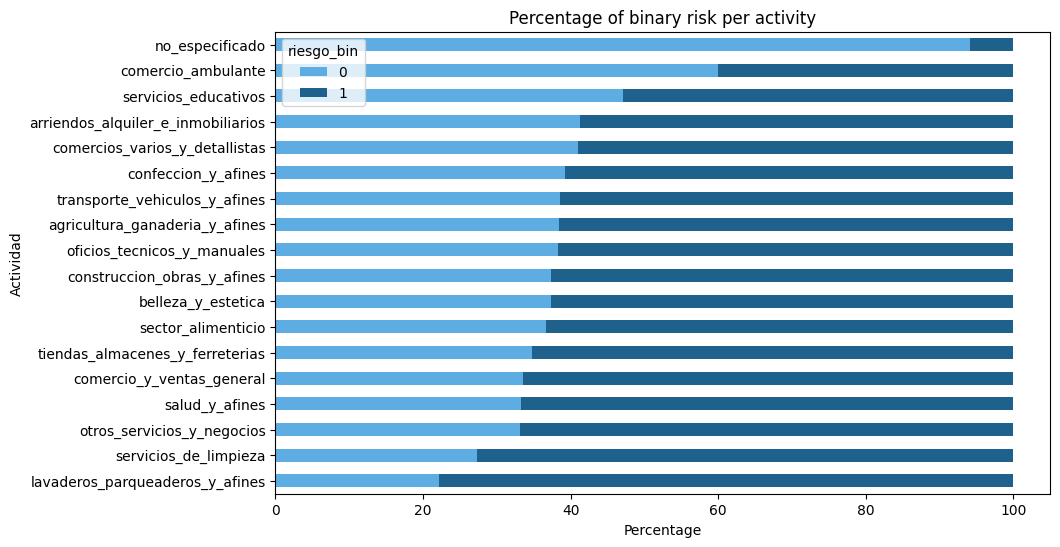

In [ ]:
print("Percentage of risk (binary) per activity:\n")

cross_table = pd.crosstab(df.actividad_v2, df.riesgo_bin, normalize="index") * 100
cross_table = cross_table.apply(lambda x: round(x, 1)).sort_values(
    by=1, ascending=False
)
print(cross_table)

colors = ["#5DADE2", "#1F618D"]
cross_table.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
plt.title(f"Percentage of binary risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Percentage")
plt.show()

### chi-square test

In [ ]:
chi2, p, dof, expected = chi2_contingency(
    cross_tab.drop("All", axis=0).drop("All", axis=1)
)
print(f"Chi-square: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant association between the activity and the risk.")
else:
    print("No significant association was found between the activity and the risk.")

Chi-square: 119.72091749164116, p-value: 1.8803444232488228e-07
There is a significant association between the activity and the risk.


### Comments

We can observe the difference in the frequency of client activities, with a higher frequency of bank clients in commerce and food sector activities such as restaurants and food sales; on the other hand, the least frequent activities are street commerce, parking lots and cleaning services.    

With respect to conclusions on the relationship between risk and activity:    
- We can notice that the proportion of risky credits is not the same for all activities. There are activities with a higher percentage of risk compared to the others.
- The activities that apparently have a higher proportion of risky loans are: Vehicle services, such as car washes and parking, cleaning services, health services such as drugstores.
- The activities with the lowest apparent risk are street commerce, educational services such as teachers, and leasing or rentals.
- We can mention that with a 95% confidence level, there is an association between risk and the activity of the credit client.



## actividad v riesgo v monto

Mean of monto(*10^6) per audit's risk per activity:



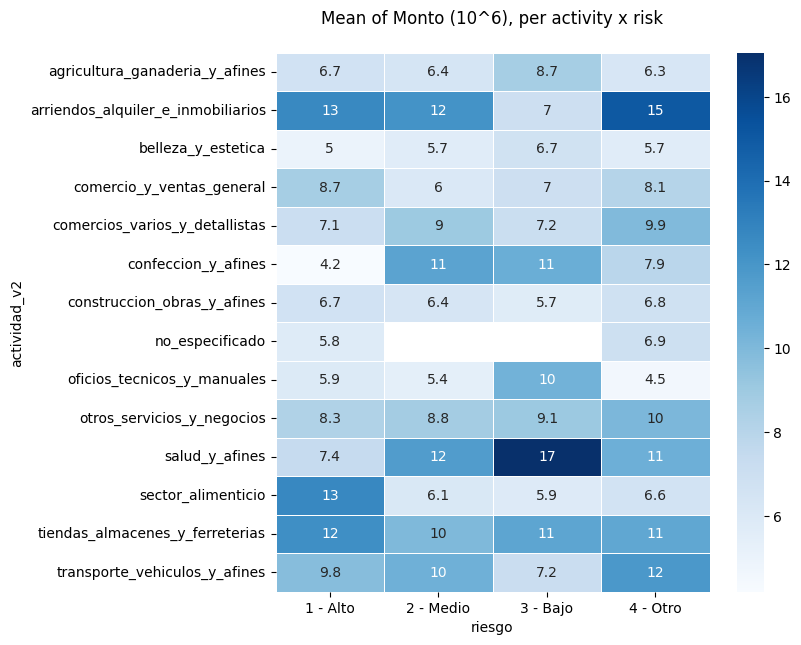

In [ ]:
print("Mean of monto(*10^6) per audit's risk per activity:\n")

# Drop activities with low frequencies
activities = cross_tab.iloc[0:-4, :].drop("All", axis=0).index
temp = df[(df["actividad_v2"].isin(activities))]

# Crosstab and heatmap
monto = temp.monto.apply(lambda x: x / 1000000)
cross_table = pd.crosstab(
    temp.actividad_v2, temp.riesgo, values=monto, aggfunc="mean"
).apply(lambda x: round(x, 2))
cross_table

plt.figure(figsize=(7, 7))
sns.heatmap(cross_table, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Mean of Monto (10^6), per activity x risk\n")
plt.show()

### Comments

In the graph above, we can analyze the relationship between activity, risk and loan amounts.  
We notice that the average loans are not equal for the different activities, being activities such as salud_y_afines, tiendas_almacenes and arriendos_alquileres those with higher average amounts.

# CONCLUSIONS

## Key findigns 

## Impact of the relationships

## Hypothesis and next steps